### Tips about imbalanced datasets

- Never test on the oversampled or undersampled dataset.
- If we want to implement cross validation, remember to oversample or undersample your training data during cross-validation, not before!
- Don't use accuracy score as a metric with imbalanced datasets (will be usually high and misleading), instead use f1-score, precision/recall score or confusion matrix

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("creditcard.csv")

In [20]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### NULL VALUES

In [5]:
data.isnull().sum().sort_values(ascending= False)
# No Null values

Time      0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V15       0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Class     0
dtype: int64

In [6]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
data.min()

Time        0.000000
V1        -56.407510
V2        -72.715728
V3        -48.325589
V4         -5.683171
V5       -113.743307
V6        -26.160506
V7        -43.557242
V8        -73.216718
V9        -13.434066
V10       -24.588262
V11        -4.797473
V12       -18.683715
V13        -5.791881
V14       -19.214325
V15        -4.498945
V16       -14.129855
V17       -25.162799
V18        -9.498746
V19        -7.213527
V20       -54.497720
V21       -34.830382
V22       -10.933144
V23       -44.807735
V24        -2.836627
V25       -10.295397
V26        -2.604551
V27       -22.565679
V28       -15.430084
Amount      0.000000
Class       0.000000
dtype: float64

### Normalizar "Amount"

In [8]:
# from sklearn.preprocessing import StandardScaler

# data['normAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
# data = data.drop(['Time','Amount'],axis=1)
# data.head()

### Percent of non-fraud and fraud payments

In [9]:
vc = data['Class'].value_counts().to_frame().reset_index()
vc['percent'] = vc["Class"].apply(lambda x : round(100*float(x) / len(data), 2))
vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})
vc

,Target,Count,percent
0,0,284315,99.83
1,1,492,0.17


[Text(0, 0, 'non-fraud'), Text(1, 0, 'fraud')]

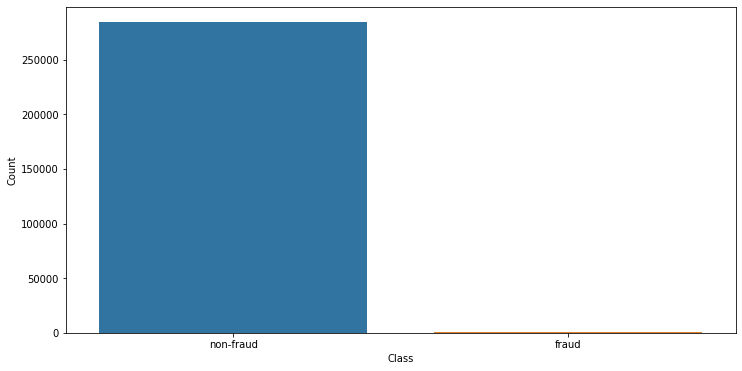

In [78]:
plt.figure(figsize=(12,6))
ax= sns.countplot(data["Class"])
ax.set(ylabel='Count')
ax.set_xticklabels(['non-fraud','fraud'])

### Duplicates

In [10]:
data.duplicated().sum()

1081

In [11]:
data.shape

(284807, 31)

In [12]:
# data.drop_duplicates(inplace=True)
print("Shape of data frame : ",data.shape[0])

Shape of data frame :  284807


In [13]:
# Do i really need to drop the duplicated values? 
# Time column: "Number of seconds elapsed between this transaction and the first transaction in the dataset"
# Time column: "Número de segundos entre esta transaccion y la primera que aparece en el dataset"

### The dataset is Imbalanced so we taking only a sample of the non-fraud cases,

In [62]:
# THIS MIGHT CAUSE OVERFITTING 
# CAN WE GET MORE DATA?

In [18]:
non_fraud = data[data['Class'] == 0].sample(1000)
fraud = data[data['Class'] == 1]
# These two are dF

### Amount Spent and the Time since the first purchase 

<AxesSubplot:xlabel='Time', ylabel='Amount'>

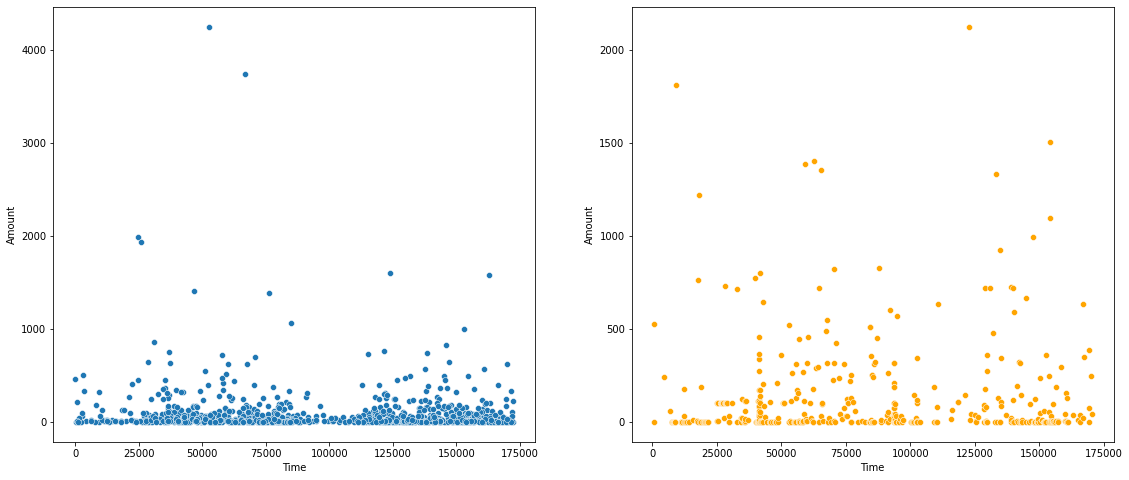

In [31]:
fig, axs = plt.subplots(ncols=2, figsize=(19,8))
sns.scatterplot(x='Time', y='Amount', data= non_fraud, ax=axs[0]) #Non Fraud
sns.scatterplot(x='Time', y='Amount', data= fraud, ax=axs[1], color= 'orange') #Fraud

In [33]:
### Less dots on the right graph, fraud. The amount spent on the fraud payments is higher

### Correlation matrix

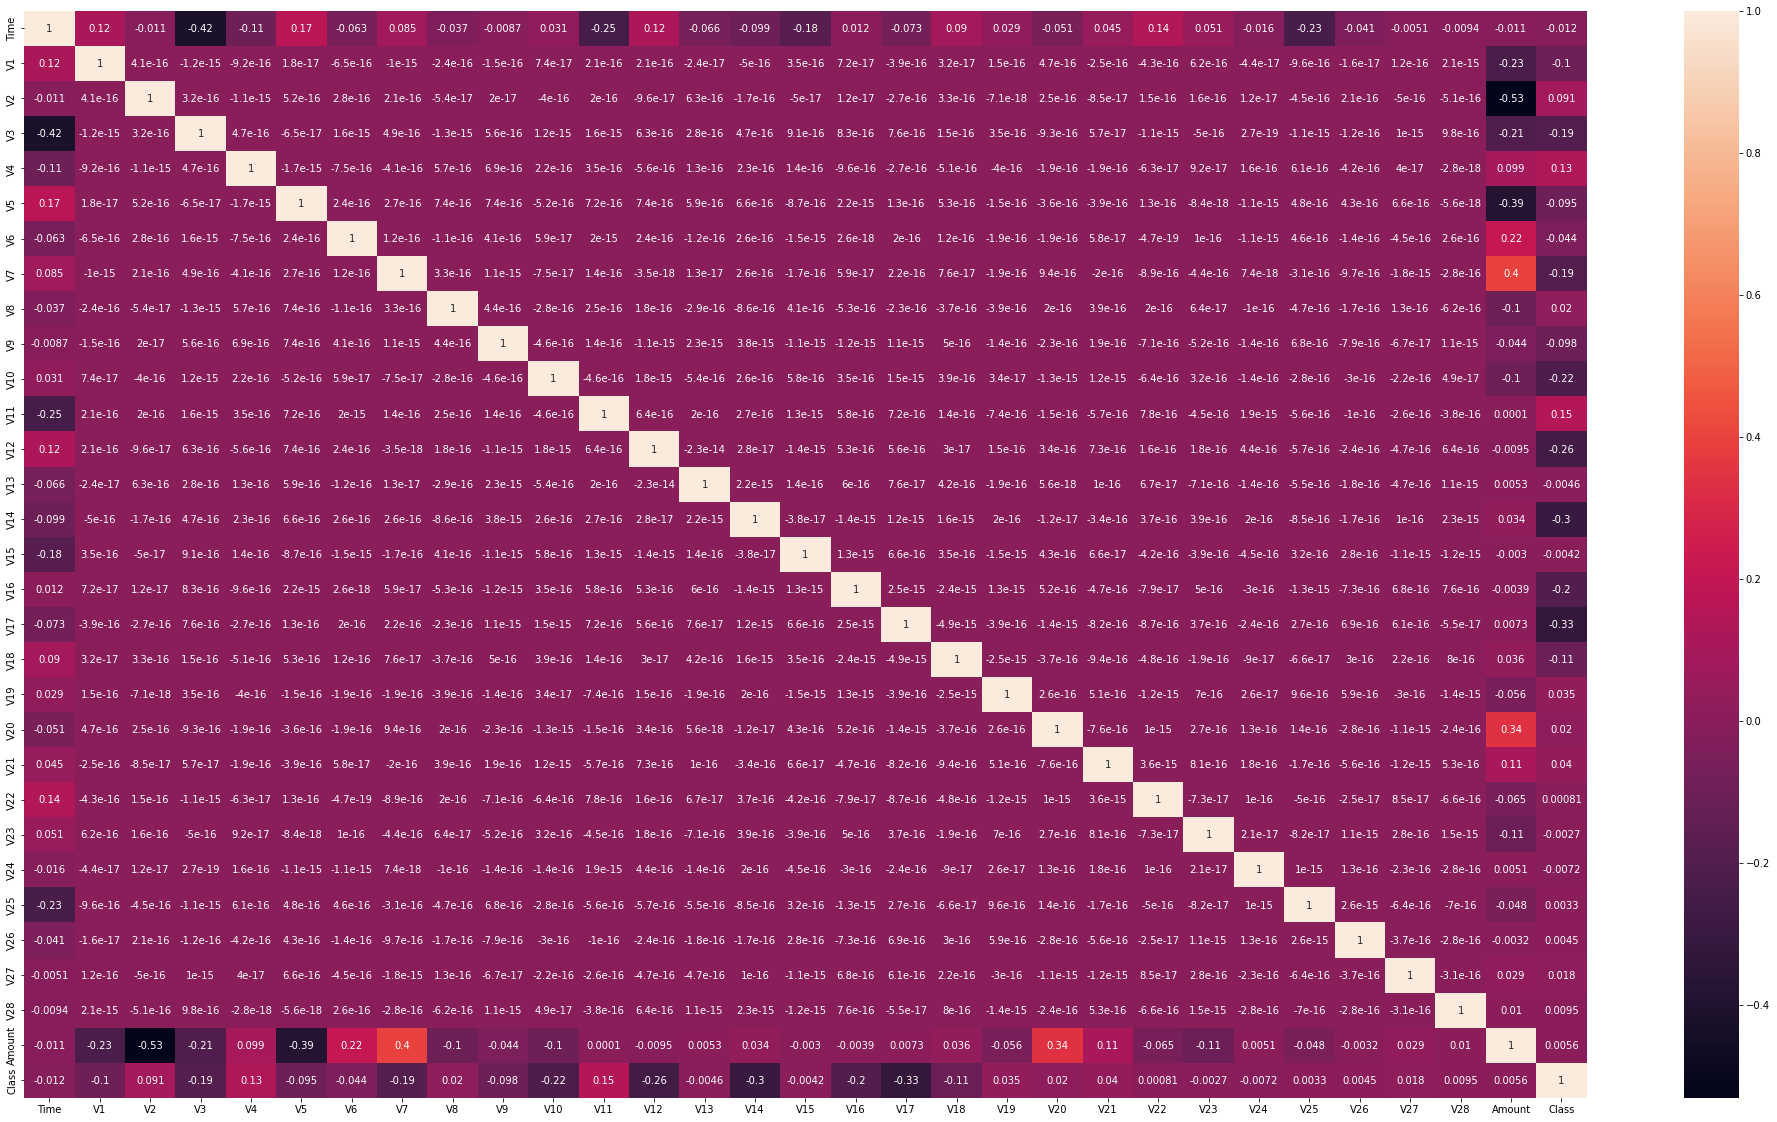

In [56]:
plt.figure(figsize=(35,20))
sns.heatmap(data.corr(),annot=True)
plt.show()
# IS this useful???? 
# How do each feature influence the target value "class"?

### Distribution of the amount spent  and the transaction time

In [48]:
import warnings
warnings.filterwarnings("ignore")

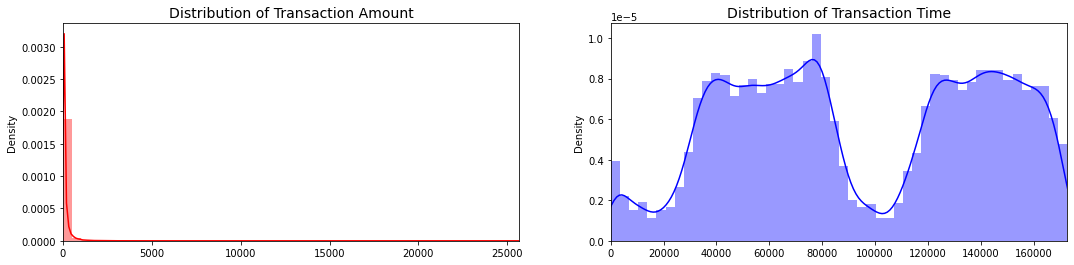

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()

In [73]:
print('Amount spent mean is:',data['Amount'].mean(), ', max Amount spent is:',data['Amount'].max())

Amount spent mean is: 88.34961925093133 , max Amount spent is: 25691.16


In [74]:
data['Time'].mean()
#??????? 20,000? 40,000?...
# Its also skewed

94813.85957508067

### Logistic Regrssion before subsampling

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [5]:
### Independent and Dependents variables
X= data.drop('Class', axis= 1)
y= data.Class

### Cross Validation KFold and Hyperparameter Tuning

In [11]:
log_class= LogisticRegression()
grid= {'C':10.0 ** np.arange(-2,3), 'penalty':['l1','l2']}
cv= KFold(n_splits=5, random_state= None, shuffle= False)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size= 0.7) 

In [13]:
clf= GridSearchCV(log_class, grid, cv=cv, n_jobs= -1, scoring='f1_macro')
clf.fit(X_train, y_train)

C:\Users\luisx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\luisx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\luisx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

### Results and metrics 

In [14]:
y_pred= clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

### Overfitting, accuracy_score= 0.99

[[85273    35]
 [   41    94]]
0.9991105181231933
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.73      0.70      0.71       135

    accuracy                           1.00     85443
   macro avg       0.86      0.85      0.86     85443
weighted avg       1.00      1.00      1.00     85443



### SUBSAMPLING AND SCALING "AMOUNT" n "TIME"

In [63]:
# Should scale it and create a dF Where there is a 50/50 ratio of non-fraud and fraud values

# RobustScaler or StandardScaler

### To-use Later

#### Shrink numerical columns with smaller dtypes

In [27]:
# https://pythonspeed.com/articles/pandas-load-less-data/

In [ ]:
# def reduce_memory(df):
#     """ iterate through all the columns of a dataframe and modify the data type
#         to reduce memory usage.        
#     """
#     start_mem = df.memory_usage().sum() / 1024**2
#     print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
#     for col in df.columns:
#         col_type = df[col].dtype
        
#         if col_type != object:
#             c_min = df[col].min()
#             c_max = df[col].max()
#             if str(col_type)[:3] == 'int':
#                 if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
#                     df[col] = df[col].astype(np.int8)
#                 elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
#                     df[col] = df[col].astype(np.int16)
#                 elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
#                     df[col] = df[col].astype(np.int32)
#                 elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
#                     df[col] = df[col].astype(np.int64)  
#             else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
#                     df[col] = df[col].astype(np.float32)
#                 else:
#                     df[col] = df[col].astype(np.float64)
#         else:
#             df[col] = df[col].astype('category')

#     end_mem = df.memory_usage().sum() / 1024**2
#     print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
#     print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
#     return df

# df = reduce_memory(df)
